#### Libs instaladas 

In [15]:
!pip install pandas
!pip install opencv-python
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/a8/a2/f139d051a5f605bffcab406bcfd3154e9f5e372c24ec0b74682141a58966/fonttools-4.45.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/158.1 kB ? eta -:--:--
     


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Imports

In [16]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

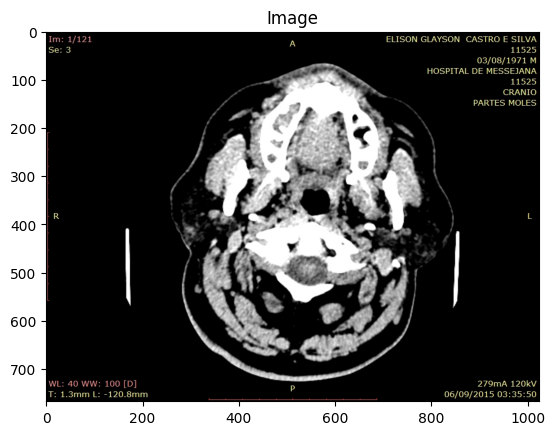

In [19]:
path_img = 'TC_Brian_ElissonGCS_avcI00001.jpg'
img = cv.imread(path_img)

# Verificar se a imagem foi carregada com sucesso
if img is None:
    print(f"Falha ao carregar a imagem: {path_img}")
else:
    # Exibir a imagem usando Matplotlib
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Image')
    plt.show()

    # Aguardar a pressão de uma tecla
    cv.waitKey(0)
    cv.destroyAllWindows()

### Funções lucas

In [ ]:
def m_uint8(img):
    from cv2 import convertScaleAbs
    img[img < 0] = 0
    return convertScaleAbs(img)
def AreaLabel(I):
    """
    Calcular a Area de atraves do bwlabel para uma imagem binaria.
    I - imagem.
    [L,num] = bwlabel(___) also returns num, the number of connected
    objects found in BW. And L returns the label matrix L that contains
    labels for the 8-connected objects found in BW. The label matrix, L,
    is the same size as BW.
    """
    import numpy as np
    import cv2
    connectivity = 8
    output = cv2.connectedComponentsWithStats(I, connectivity, cv2.CV_8U)
    L = output[1]  # Label matrix
    area = [np.sum(L == x) for x in range(0, output[0])]  # Number of labels
    # Return valor, indice and L
    return np.sort(area), np.argsort(np.unique(area)), L
def withinSkull(imgOrig):
    """
    fuzzy c-mean image segmentation with weighted
    :param imgOrig: grayscale image
    :param count_debug:
    :return: imgUtil: 2d array
        Multiplicao de imgOrig e skull,
    :return: skullInside: 2d array
        Parte interior do cerebro
    :return: skull: 2d array
        Cerebro sendo 1, resto sendo 0
    :return: se: 2d array
        Elementro estruturante 19x19
    """
    from data_information.dcm_information import m_uint8
    from os.path import abspath, join, dirname
    import numpy as np
    import cv2
    import sys

    sys.path.insert(0, abspath(join(dirname(__file__), '..')))

    from AreaLabel import AreaLabel

    int1 = np.uint8(1)
    int0 = np.uint8(0)
    b_matrix = np.where(imgOrig >= 255, int1, int0)

    # Fechamento
    # Array of 19x19
    ee_str = np.array((
        [[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
         [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]]
    ), dtype=np.uint8)

    for x in range(0, 9):
        b_matrix = cv2.erode(cv2.dilate(b_matrix, ee_str), ee_str)

    _, index, L = AreaLabel(b_matrix)

    # Calcular a Area de todos os label encontrados.
    if len(index) >= 1:
        skull = np.where(L == index[0], int0, int1)
    elif len(index) == 0:
        skull = 1 - L

    # [Matheus] Codigo para representar 'floodfill' do MATLAB
    im_flood_fill = np.copy(skull)
    h, w = skull.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)
    # Floodfill from point (0, 0)
    cv2.floodFill(im_flood_fill, mask, (0, 0), 255)
    # Invert floodfilled image
    # Combine the two images to get the foreground
    skull_inside = np.bitwise_or(skull, cv2.bitwise_not(im_flood_fill))

    # Segunda Etapa
    # Realizar uma erosao
    # Obs: realizar uma erosao umas 5 ou 6 vezes para retirar as bordas.
    ee_str_2 = np.ones((5, 5), dtype=np.uint8)  # ElementoEstruturante 15

    for i in range(0, 3):  # 10
        skull_inside = cv2.erode(1 - skull, ee_str_2)

    # [Lucas] - Nao pode haver aberturas no osso do cranio
    kernel = np.ones((5, 5), np.uint8)
    skull_inside = cv2.erode(skull_inside, kernel, iterations=12)
    skull_inside = cv2.dilate(skull_inside, kernel, iterations=12)

    valor, index, L = AreaLabel(skull_inside)
    if len(index) > 1:
        skull_inside = np.where(L == index[2], int1, int0)
    elif len(index) == 0:
        skull_inside = L.copy()
    else:
        skull_inside = np.where((1 - skull) == index,
                                int1, int0)
    # img_util, skull_inside, skull, ee_str
    return m_uint8(imgOrig) * skull_inside, \
           skull_inside, skull, ee_str